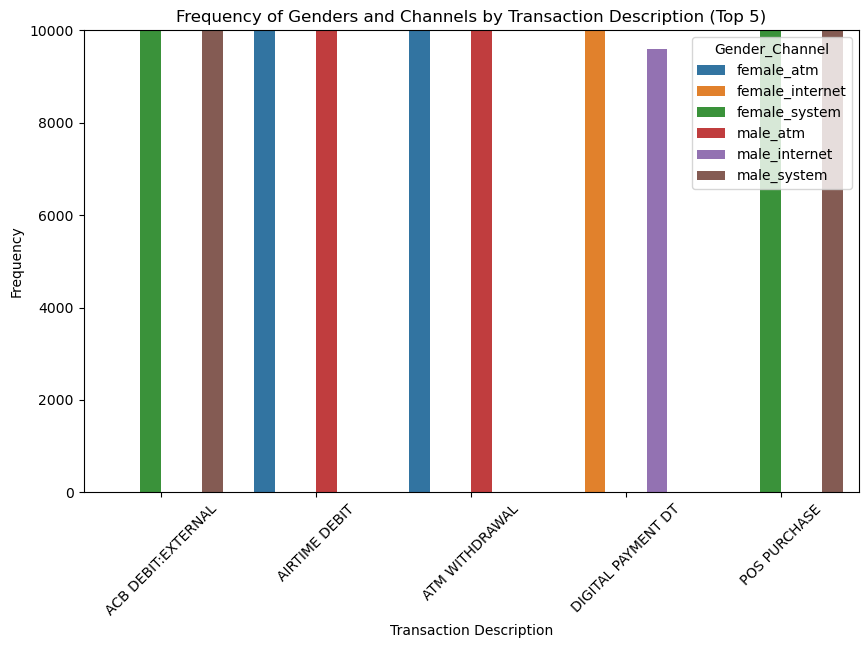

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv('/Users/dam115/Downloads/data8.csv')
data2= data.drop()[["TRANSACTION_DESCRIPTION"].str.contains("ATM")]
# Create frequency table using pandas
transaction_descriptions = data['TRANSACTION_DESCRIPTION'].value_counts().head(5).index
data_filtered = data[data['TRANSACTION_DESCRIPTION'].isin(transaction_descriptions)]

# Create frequency table
freq_table = pd.crosstab(index=data_filtered.TRANSACTION_DESCRIPTION, columns=[data_filtered.GENDER, data_filtered.CHANNEL])

# Flatten multi-index columns for seaborn plotting
freq_table.columns = ['_'.join(col).strip() for col in freq_table.columns.values]

# Reset index to make TRANSACTION_DESCRIPTION a column
freq_table = freq_table.reset_index()

# Melt the data for seaborn plotting
melted_freq_table = pd.melt(freq_table, id_vars='TRANSACTION_DESCRIPTION', var_name='Gender_Channel', value_name='Frequency')

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_freq_table, x='TRANSACTION_DESCRIPTION', y='Frequency', hue='Gender_Channel')
plt.xticks(rotation=45)
plt.xlabel('Transaction Description')
plt.ylabel('Frequency')
plt.title('Frequency of Genders and Channels by Transaction Description (Top 5)')
plt.legend(title='Gender_Channel', loc='upper right')
plt.ylim(0,10000)
plt.show()